# EVAL LAB 5
## Zeel Mehta 21BAI1533

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [307]:
df=pd.read_csv('/Users/zeelmehta/Desktop/Indian Liver Patient Dataset (ILPD).csv')

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   65      582 non-null    int64  
 1   Female  582 non-null    object 
 2   0.7     582 non-null    float64
 3   0.1     582 non-null    float64
 4   187     582 non-null    int64  
 5   16      582 non-null    int64  
 6   18      582 non-null    int64  
 7   6.8     582 non-null    float64
 8   3.3     582 non-null    float64
 9   0.9     578 non-null    float64
 10  1       582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [309]:
df.isnull().sum()

65        0
Female    0
0.7       0
0.1       0
187       0
16        0
18        0
6.8       0
3.3       0
0.9       4
1         0
dtype: int64

In [310]:
df.columns

Index(['65', 'Female', '0.7', '0.1', '187', '16', '18', '6.8', '3.3', '0.9',
       '1'],
      dtype='object')

In [311]:
df.dtypes

65          int64
Female     object
0.7       float64
0.1       float64
187         int64
16          int64
18          int64
6.8       float64
3.3       float64
0.9       float64
1           int64
dtype: object

In [312]:
df.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


## Perform pre-processing if required ( 2 Marks ) 

In [313]:
df.columns =['age', 'gender', 'tb', 'db','alkphos','sgpt','sgot','tp','alb','agratio','label']
df.head()

,age,gender,tb,db,alkphos,sgpt,sgot,tp,alb,agratio,label
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [314]:
from sklearn.preprocessing import LabelEncoder
def Encoder(df):
          col=df['gender']
          le = LabelEncoder()
          for feature in col:
              try:
                  df['gender'] = le.fit_transform(df['gender'])
              except:
                  print('Error encoding '+feature)
          return df

In [315]:
Encoder(df)
df['gender']

0      1
1      1
2      1
3      1
4      1
      ..
577    1
578    1
579    1
580    1
581    1
Name: gender, Length: 582, dtype: int64

In [316]:
df.isnull().sum()

age        0
gender     0
tb         0
db         0
alkphos    0
sgpt       0
sgot       0
tp         0
alb        0
agratio    4
label      0
dtype: int64

In [317]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='mean')
df['agratio']=imp.fit_transform(x)

In [318]:
df['agratio'].isnull().sum()

0

In [319]:
df.head()

,age,gender,tb,db,alkphos,sgpt,sgot,tp,alb,agratio,label
0,62,1,10.9,5.5,699,64,100,7.5,3.2,62.0,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,62.0,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,58.0,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,72.0,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,46.0,1


## Draw the heat map ( 2 Marks)

<AxesSubplot:>

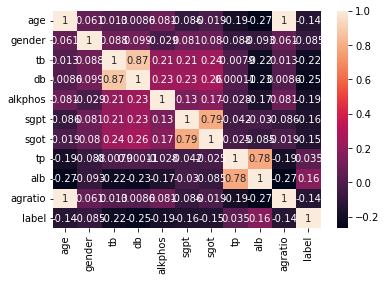

In [320]:
sns.heatmap(df.corr(),annot=True)

## Split the dataset into Train and Test.

In [321]:
from sklearn.model_selection import train_test_split

In [322]:
x=df.drop('label',axis=1)
x

,age,gender,tb,db,alkphos,sgpt,sgot,tp,alb,agratio
0,62,1,10.9,5.5,699,64,100,7.5,3.2,62.0
1,62,1,7.3,4.1,490,60,68,7.0,3.3,62.0
2,58,1,1.0,0.4,182,14,20,6.8,3.4,58.0
3,72,1,3.9,2.0,195,27,59,7.3,2.4,72.0
4,46,1,1.8,0.7,208,19,14,7.6,4.4,46.0
...,...,...,...,...,...,...,...,...,...,...
577,60,1,0.5,0.1,500,20,34,5.9,1.6,60.0
578,40,1,0.6,0.1,98,35,31,6.0,3.2,40.0
579,52,1,0.8,0.2,245,48,49,6.4,3.2,52.0
580,31,1,1.3,0.5,184,29,32,6.8,3.4,31.0


In [323]:
y=df['label']
y

0      1
1      1
2      1
3      1
4      1
      ..
577    2
578    1
579    1
580    1
581    2
Name: label, Length: 582, dtype: int64

In [324]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [325]:
x_train.head()

,age,gender,tb,db,alkphos,sgpt,sgot,tp,alb,agratio
81,49,1,0.7,0.1,148,14,12,5.4,2.8,49.0
260,33,1,1.5,7.0,505,205,140,7.5,3.9,33.0
402,65,1,0.7,0.2,199,19,22,6.3,3.6,65.0
26,34,1,6.2,3.0,240,1680,850,7.2,4.0,34.0
359,24,1,0.7,0.2,218,47,26,6.6,3.3,24.0


In [326]:
x_test.head()

,age,gender,tb,db,alkphos,sgpt,sgot,tp,alb,agratio
62,57,1,0.7,0.2,208,35,97,5.1,2.1,57.0
378,72,1,0.7,0.2,185,16,22,7.3,3.7,72.0
24,34,1,4.1,2.0,289,875,731,5.0,2.7,34.0
441,42,0,7.4,3.6,298,52,102,4.6,1.9,42.0
257,36,1,0.8,0.2,182,31,34,6.4,3.8,36.0


In [327]:
y_train.head()

81     2
260    1
402    2
26     1
359    1
Name: label, dtype: int64

In [328]:
y_test.head()

62     1
378    2
24     1
441    1
257    2
Name: label, dtype: int64

## Apply Decision Tree on the data( 3 Marks ) 

In [329]:
from sklearn.tree import DecisionTreeClassifier

In [330]:
dt=DecisionTreeClassifier()

In [331]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [332]:
pred=dt.predict(x_test)

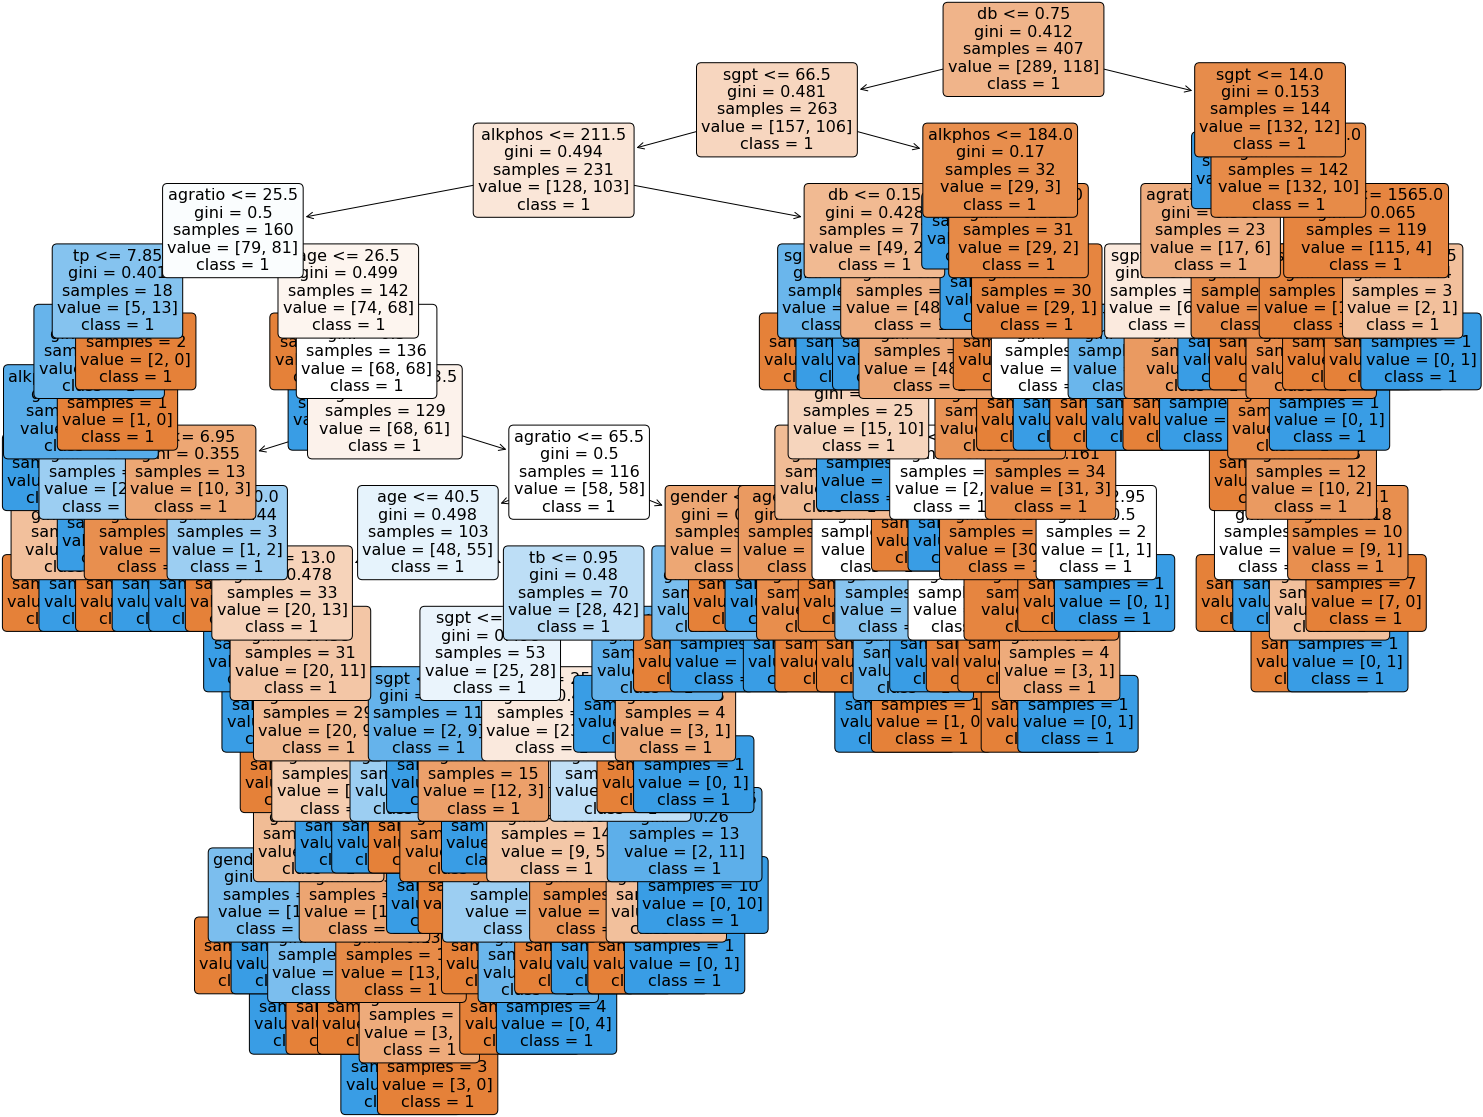

In [333]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,20))
x.columns = x.columns.astype(str)
y=y.astype(str)
a = plot_tree(dt,feature_names=x.columns,class_names=y,filled=True,rounded=True, fontsize=16)

## Display the classification metrics. (3 Marks)

In [334]:
from sklearn.metrics import classification_report,confusion_matrix

In [335]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.75      0.71      0.73       126
           2       0.35      0.41      0.38        49

    accuracy                           0.62       175
   macro avg       0.55      0.56      0.55       175
weighted avg       0.64      0.62      0.63       175



In [336]:
print(confusion_matrix(y_test,pred))

[[89 37]
 [29 20]]


## Perform cross validation using cross ( 5 Marks ) 

In [337]:
from sklearn.model_selection import cross_val_score

In [338]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300,random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=0)

In [339]:
rfpred= rf.predict(x_test)

In [340]:
print(confusion_matrix(y_test,rfpred))

[[106  20]
 [ 32  17]]


In [341]:
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           1       0.77      0.84      0.80       126
           2       0.46      0.35      0.40        49

    accuracy                           0.70       175
   macro avg       0.61      0.59      0.60       175
weighted avg       0.68      0.70      0.69       175



In [342]:
all_accuracies=cross_val_score(estimator=rf,X=x_train,y=y_train,cv=5)

In [343]:
all_accuracies

array([0.73170732, 0.62195122, 0.65432099, 0.7037037 , 0.71604938])

In [344]:
all_accuracies.mean()

0.685546522131888